In [1]:
from TetriumColor.Observer import Observer, Spectra, Illuminant
from TetriumColor import ColorSpace
from scipy.io import loadmat
import numpy as np
import csv

import matplotlib.pyplot as plt

In [2]:
def save_ref_data(name,spectrum):
    with open(f'{name}.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Wavelength', 'Reflectance'])
        for i, value in enumerate(spectrum):
            writer.writerow([int(wavelengths[i]), value])

In [4]:
radiance_data = loadmat('./data/radiance_by_reflectance_cyflower1.mat')

In [5]:
wavelengths = radiance_data['radiance'][:, 0]

In [28]:
trichromat = Observer.trichromat(wavelengths)

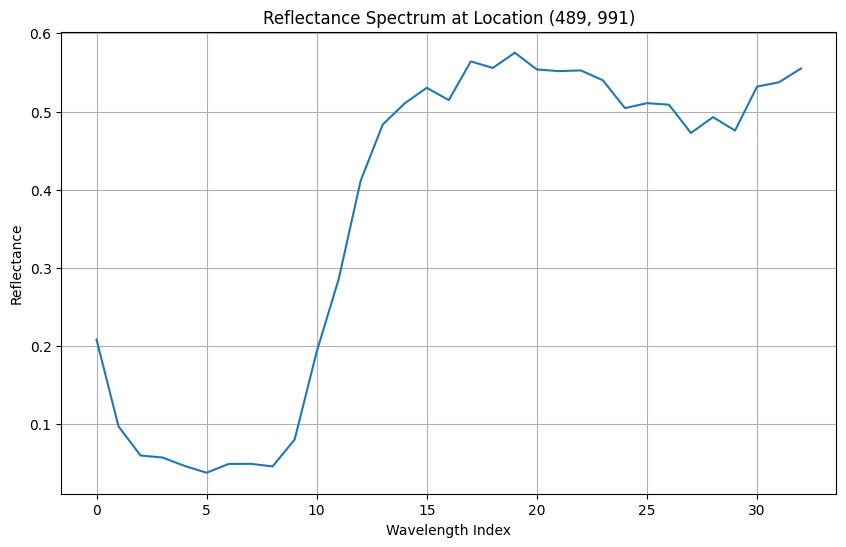

In [7]:
data = loadmat('./data/ref_cyflower1bb_reg1.mat')
hyperspectral_image = data['reflectances']

selected_point = (489, 991)
# Extract the row and column from the selected point
row, col = int(selected_point[0]), int(selected_point[1])

# Extract the reflectance spectrum at the selected location
reflectance_spectrum = hyperspectral_image[row, col, :]

# Plot the reflectance spectrum
plt.figure(figsize=(10, 6))
plt.plot(reflectance_spectrum)
plt.title(f"Reflectance Spectrum at Location ({row}, {col})")
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance")
plt.grid(True)
plt.show()

In [15]:
d65 = Illuminant.get("D65").interpolate_values(wavelengths)
save_ref_data('d65', d65.data)

In [16]:
spectra = d65.data * reflectance_spectrum
save_ref_data('ref_w_d65', spectra)

In [31]:
print(trichromat.observe_normalized(spectra))
print(Spectra(wavelengths=wavelengths,data=spectra).to_rgb())

[ 0.05553725  0.37131291  0.39575001]
[ 0.74985593  0.66329803  0.02981869]


In [18]:
image = plt.imread('./data/cyflower1bb_reg1_2bright.bmp')
plt.imsave('output_image.png', image)